In [10]:
from fit_model import *

In [11]:
from time import time

In [12]:
def define_model_1(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    model.add(GRU(n_units,input_shape=(src_timesteps,1)))
    # ES NECESARIO, para que asi pueda devolver la dimesión de 8
    model.add(RepeatVector(tar_timesteps))
    model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
    return model
    
def define_model_1_var(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    model.add(GRU(n_units,input_shape=(src_timesteps,1)))
    model.add(RepeatVector(tar_timesteps)) 
    model.add(TimeDistributed(Dense(n_units, activation='relu')))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
    return model

# Encoder-Decoder
def define_model_4(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    # Encoder
    model.add(GRU(n_units, input_shape=(src_timesteps,1), go_backwards=True ))
    model.add(RepeatVector(tar_timesteps))
    # Decoder
    model.add(GRU(n_units))
    model.add(RepeatVector(tar_timesteps))
    model.add(TimeDistributed(Dense(n_units, activation='relu')))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
    return model

In [13]:
folderImg_name = "img_caro/cm_model_"
folderModels_name = "models_caro/cm_model_"
folderHistories_name = "histories_caro/cm_history_"

ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', \
                                       'dataset/english-spanish-train-10000.txt', \
                                       'dataset/english-spanish-test-10000.txt'
epochs= 35

In [14]:
def extract_histories(quantity, vector_namesHistory):
    for i in range(1,quantity+1):
        history = load_history(vector_namesHistory[i-1])
        history_models_trainLoss.append(history['loss'])
        history_models_testLoss.append(history['val_loss'])
    
def graph_historyModels(history,title, nameModels, save_image_filename):
    # define axis X , Create count of the number of epochs
    epoch_count = range(1,epochs +1)
        
    plt.plot(epoch_count, history[0], 'r-')
    plt.plot(epoch_count, history[1], 'b-')
    plt.plot(epoch_count, history[2], 'g-')
    plt.legend(nameModels)
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    # Visualize loss history
    plt.savefig(save_image_filename) 
    plt.show() 
    
    # print min values
    print(f"{nameModels[0]} = {round(min(history[0]),4) }" )
    print(f"{nameModels[1]} = {round(min(history[1]),4)}" )
    print(f"{nameModels[2]} = {round(min(history[2]),4)}" )

# Pruebas Modelo 1

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_7 (GRU)                 (None, 123)               46494     
                                                                 
 repeat_vector_7 (RepeatVect  (None, 8, 123)           0         
 or)                                                             
                                                                 
 time_distributed_7 (TimeDis  (None, 8, 4510)          559240    
 tributed)                                                       
                                                                 
Total params: 605,734
Trainable params: 605,734
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/35

Epoch 1: val_loss improved from inf to 3.03846, saving model to models_caro\cm_model_1_7.h5
125/125 - 71s - l

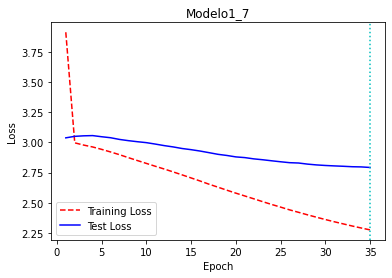

In [19]:
units = 123
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
batch_size= 64
id_variation = '1_7'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)

graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 256)               198912    
                                                                 
 repeat_vector_8 (RepeatVect  (None, 8, 256)           0         
 or)                                                             
                                                                 
 time_distributed_8 (TimeDis  (None, 8, 4510)          1159070   
 tributed)                                                       
                                                                 
Total params: 1,357,982
Trainable params: 1,357,982
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/35

Epoch 1: val_loss improved from inf to 3.02569, saving model to models_caro\cm_model_1_8.h5
250/250 - 18s

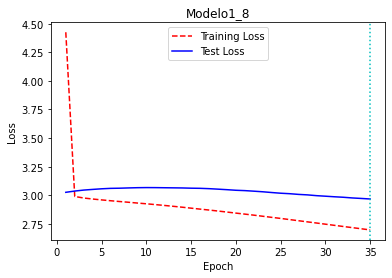

In [20]:
units = 256
learning_rate = 0.0001
loss_func='sparse_categorical_crossentropy'
batch_size= 32
id_variation = '1_8'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)

graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_9 (GRU)                 (None, 1024)              3154944   
                                                                 
 repeat_vector_9 (RepeatVect  (None, 8, 1024)          0         
 or)                                                             
                                                                 
 time_distributed_9 (TimeDis  (None, 8, 4510)          4622750   
 tributed)                                                       
                                                                 
Total params: 7,777,694
Trainable params: 7,777,694
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/35

Epoch 1: val_loss improved from inf to 2.97129, saving model to models_caro\cm_model_1_9.h5
125/125 - 43s

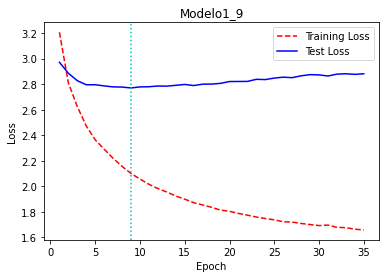

In [21]:
units = 1024
learning_rate = 0.003
loss_func='sparse_categorical_crossentropy'
batch_size= 64
id_variation = '1_9'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

initime = time()
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
print( f"time elapsed: {time()-initime}")
graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

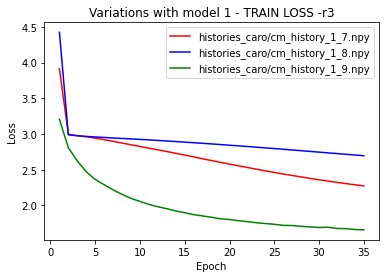

histories_caro/cm_history_1_7.npy = 2.2743
histories_caro/cm_history_1_8.npy = 2.6968
histories_caro/cm_history_1_9.npy = 1.6581


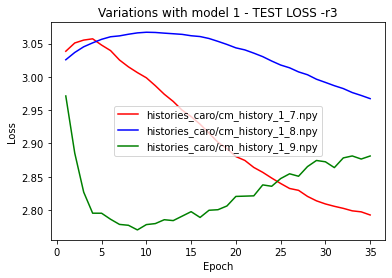

histories_caro/cm_history_1_7.npy = 2.7925
histories_caro/cm_history_1_8.npy = 2.9673
histories_caro/cm_history_1_9.npy = 2.7701


In [22]:
history_models_trainLoss = list()
history_models_testLoss = list()

flder = folderHistories_name
vector_namesHistory = [flder+'1_7.npy',flder+'1_8.npy',flder+'1_9.npy']
vector_names_legends = ['Model_1_7', 'Model_1_8','Model_1_9']

extract_histories(3, vector_namesHistory)

graph_historyModels(history_models_trainLoss,"Variations with model 1 - TRAIN LOSS -r3", \
                             vector_namesHistory,  \
                             folderImg_name+"1_variations_trainLoss_r3")

graph_historyModels(history_models_testLoss,"Variations with model 1 - TEST LOSS -r3",  \
                             vector_namesHistory,  \
                             folderImg_name+"1_variations_testLoss_r3")

# Pruebas Modelo 1 var

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_10 (GRU)                (None, 256)               198912    
                                                                 
 repeat_vector_10 (RepeatVec  (None, 8, 256)           0         
 tor)                                                            
                                                                 
 time_distributed_10 (TimeDi  (None, 8, 256)           65792     
 stributed)                                                      
                                                                 
 dropout_3 (Dropout)         (None, 8, 256)            0         
                                                                 
 time_distributed_11 (TimeDi  (None, 8, 4510)          1159070   
 stributed)                                                      


250/250 - 18s - loss: 2.2949 - acc: 0.6409 - val_loss: 2.8168 - val_acc: 0.6417 - 18s/epoch - 70ms/step
time elapsed: 617.5390861034393


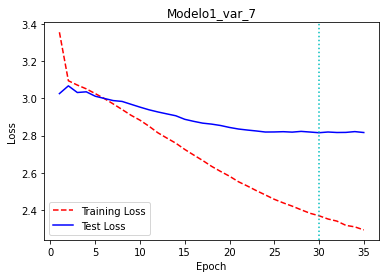

In [23]:
units = 256
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
batch_size= 32
id_variation = '1_var_7'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1_var(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

initime = time()
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
print( f"time elapsed: {time()-initime}")
graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_11 (GRU)                (None, 256)               198912    
                                                                 
 repeat_vector_11 (RepeatVec  (None, 8, 256)           0         
 tor)                                                            
                                                                 
 time_distributed_12 (TimeDi  (None, 8, 256)           65792     
 stributed)                                                      
                                                                 
 dropout_4 (Dropout)         (None, 8, 256)            0         
                                                                 
 time_distributed_13 (TimeDi  (None, 8, 4510)          1159070   
 stributed)                                                      


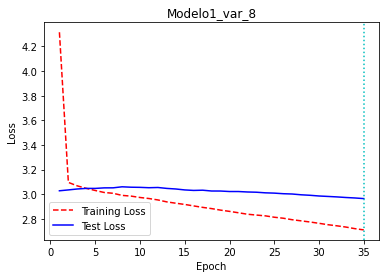

In [24]:
units = 256
learning_rate = 0.0001
loss_func='sparse_categorical_crossentropy'
batch_size= 32
id_variation = '1_var_8'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1_var(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

initime = time()
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
print( f"time elapsed: {time()-initime}")
graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 256)               198912    
                                                                 
 repeat_vector_12 (RepeatVec  (None, 8, 256)           0         
 tor)                                                            
                                                                 
 time_distributed_14 (TimeDi  (None, 8, 256)           65792     
 stributed)                                                      
                                                                 
 dropout_5 (Dropout)         (None, 8, 256)            0         
                                                                 
 time_distributed_15 (TimeDi  (None, 8, 4510)          1159070   
 stributed)                                                      


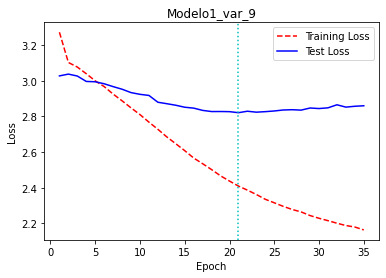

In [25]:
units = 256
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
batch_size= 16
id_variation = '1_var_9'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1_var(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

initime = time()
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
print( f"time elapsed: {time()-initime}")
graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

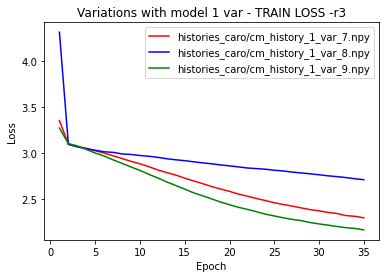

histories_caro/cm_history_1_var_7.npy = 2.2949
histories_caro/cm_history_1_var_8.npy = 2.7097
histories_caro/cm_history_1_var_9.npy = 2.1628


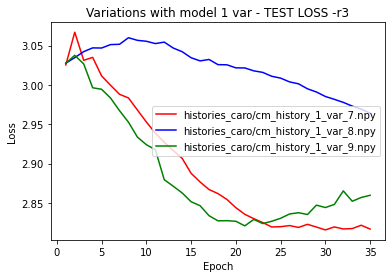

histories_caro/cm_history_1_var_7.npy = 2.8157
histories_caro/cm_history_1_var_8.npy = 2.9641
histories_caro/cm_history_1_var_9.npy = 2.8209


In [26]:
history_models_trainLoss = list()
history_models_testLoss = list()

flder = folderHistories_name

vector_namesHistory = [flder+'1_var_7.npy',flder+'1_var_8.npy',flder+'1_var_9.npy']
vector_names_legends = ['Model_1_var_7', 'Model_1_var_8','Model_1_var_9']

extract_histories(3, vector_namesHistory)

graph_historyModels(history_models_trainLoss,"Variations with model 1 var - TRAIN LOSS -r3", \
                             vector_namesHistory,  \
                             folderImg_name+"1_var_variations_trainLoss_r3")

graph_historyModels(history_models_testLoss,"Variations with model 1 var - TEST LOSS -r3",  \
                             vector_namesHistory,  \
                             folderImg_name+"1_var_variations_testLoss_r3")

# Pruebas de Modelo 4

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_13 (GRU)                (None, 128)               50304     
                                                                 
 repeat_vector_13 (RepeatVec  (None, 8, 128)           0         
 tor)                                                            
                                                                 
 gru_14 (GRU)                (None, 128)               99072     
                                                                 
 repeat_vector_14 (RepeatVec  (None, 8, 128)           0         
 tor)                                                            
                                                                 
 time_distributed_16 (TimeDi  (None, 8, 128)           16512     
 stributed)                                                      

Epoch 35/35

Epoch 35: val_loss improved from 2.86948 to 2.86851, saving model to models_caro\cm_model_4_7.h5
125/125 - 12s - loss: 2.6146 - acc: 0.6411 - val_loss: 2.8685 - val_acc: 0.6417 - 12s/epoch - 99ms/step
time elapsed: 481.544246673584


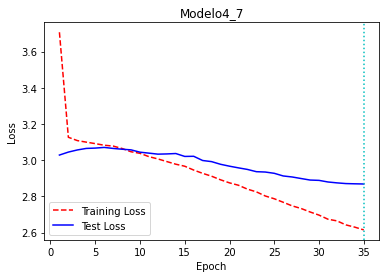

In [27]:
units = 128
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
batch_size= 64
id_variation = '4_7'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_4(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

initime = time()
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
print( f"time elapsed: {time()-initime}")
graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_15 (GRU)                (None, 32)                3360      
                                                                 
 repeat_vector_15 (RepeatVec  (None, 8, 32)            0         
 tor)                                                            
                                                                 
 gru_16 (GRU)                (None, 32)                6336      
                                                                 
 repeat_vector_16 (RepeatVec  (None, 8, 32)            0         
 tor)                                                            
                                                                 
 time_distributed_18 (TimeDi  (None, 8, 32)            1056      
 stributed)                                                      

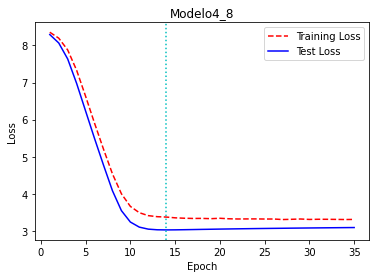

In [28]:
units = 32
learning_rate = 0.0001
loss_func='sparse_categorical_crossentropy'
batch_size= 128
id_variation = '4_8'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_4(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

initime = time()
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
print( f"time elapsed: {time()-initime}")
graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_17 (GRU)                (None, 256)               198912    
                                                                 
 repeat_vector_17 (RepeatVec  (None, 8, 256)           0         
 tor)                                                            
                                                                 
 gru_18 (GRU)                (None, 256)               394752    
                                                                 
 repeat_vector_18 (RepeatVec  (None, 8, 256)           0         
 tor)                                                            
                                                                 
 time_distributed_20 (TimeDi  (None, 8, 256)           65792     
 stributed)                                                      

250/250 - 23s - loss: 2.3299 - acc: 0.6409 - val_loss: 2.8150 - val_acc: 0.6417 - 23s/epoch - 92ms/step
Epoch 35/35

Epoch 35: val_loss did not improve from 2.81037
250/250 - 23s - loss: 2.3171 - acc: 0.6410 - val_loss: 2.8110 - val_acc: 0.6417 - 23s/epoch - 93ms/step
time elapsed: 801.0043318271637


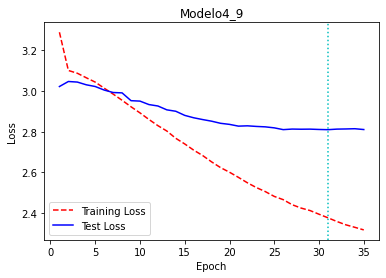

In [29]:
units = 256
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
batch_size= 32
id_variation = '4_9'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_4(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

initime = time()
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
print( f"time elapsed: {time()-initime}")
graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

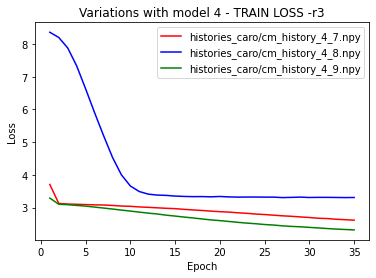

histories_caro/cm_history_4_7.npy = 2.6146
histories_caro/cm_history_4_8.npy = 3.3049
histories_caro/cm_history_4_9.npy = 2.3171


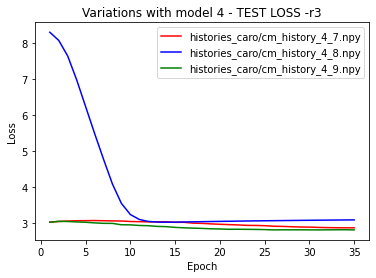

histories_caro/cm_history_4_7.npy = 2.8685
histories_caro/cm_history_4_8.npy = 3.0249
histories_caro/cm_history_4_9.npy = 2.8104


In [30]:
history_models_trainLoss = list()
history_models_testLoss = list()

flder = folderHistories_name

vector_namesHistory = [flder+'4_7.npy',flder+'4_8.npy',flder+'4_9.npy']
vector_names_legends = ['Model_4_7', 'Model_4_8','Model_4_9']

extract_histories(3, vector_namesHistory)

graph_historyModels(history_models_trainLoss,"Variations with model 4 - TRAIN LOSS -r3", \
                             vector_namesHistory,  \
                             folderImg_name+"4_variations_trainLoss_r3")

graph_historyModels(history_models_testLoss,"Variations with model 4 - TEST LOSS -r3",  \
                             vector_namesHistory,  \
                             folderImg_name+"4_variations_testLoss_r3")
